In [94]:
#Import packages and MNIST data
!pip install tensorly

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
from torch.nn.parameter import Parameter
from torchvision.datasets import MNIST
from torch.autograd import Variable
from torch.nn import Linear, Conv2d, BatchNorm2d, MaxPool2d, Dropout2d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import FactorAnalysis, PCA

import tensorly as tl
from tensorly import unfold as tl_unfold
from tensorly.decomposition import parafac

dim = 28

mnist_trainset = MNIST("/work/Speciale/PreProject/02456/Week3/temp", train=True, download=True)
mnist_testset = MNIST("/work/Speciale/PreProject/02456/Week3/temp", train=False, download=True)

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


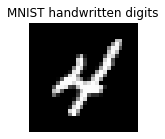

In [ ]:
## First try at making a "manual" convolution rutine. First we apply filters that are made from outer products ##
## of vectors (the normal conv), and after we try using the vectors to get the same result, by applying them one ##
## after the other.##

# choose a single picture from the MNIST data set.
one_pic = x_train = mnist_trainset.data[9].view(-1, 784).float()


# visualize matrix of tensors as gray scale image
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(one_pic.reshape((dim, dim)), cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()

# Make filters from outer product of vectors

In [ ]:
# Make filters 
filterbase1=[[1,0,1],[1,0,1]];
filterbase1_t = torch.tensor(filterbase1)

filter1 = [[[1,0.5,1],[0,0,0],[1,0,1]]]; #changed
filter1_t = torch.tensor(filter1)

filterbase2 = [[1,1,1],[0.33,0.66,0.99]];
filterbase2_t = torch.tensor(filterbase2)

filter2 = [[0.5,0.66,0.99],[0.33,0.66,0.99],[0.33,0.66,0.99]]; #changed
filter2_t = torch.tensor(filter2)

filterbase3=[[1,1,1],[0,1,0]];
filterbase3_t = torch.tensor(filterbase3)

filter3 = [[[0,1,0],[0,1,0],[0,1,0]]];
filter3_t = torch.tensor(filter3)

filterbase4=[[0,1,0],[1,1,1]];
filterbase4_t = torch.tensor(filterbase4)

filter4 = [[[0,0,0],[1,1,1],[0,0,0]]];
filter4_t = torch.tensor(filter4)


In [ ]:
#Reshape filter and picture to prepare them for 2D convolution filter
one_pic_reshape=one_pic.reshape(1,1,dim, dim)

#filter 1
filter1_t_reshape=filter1_t.reshape(1,1,3,3).float()
#filrer 2
filter2_t_reshape=filter2_t.reshape(1,1,3,3).float()
#combining two filter as a two depth filter
filters=torch.cat((filter3_t.reshape(1,1,3,3), filter4_t.reshape(1,1,3,3)), 1).float()

In [ ]:
# Use filters on MNIST picture seperately.
conv1 = F.conv2d(one_pic_reshape, filter1_t_reshape, padding = 1)
conv2 = F.conv2d(one_pic_reshape, filter2_t_reshape, padding = 1)

#combine convolutions to a two depth 
convs = torch.cat((conv1, conv2), 1)
#use two depth  filter om combination
output = F.conv2d(convs,filters, padding = 1)

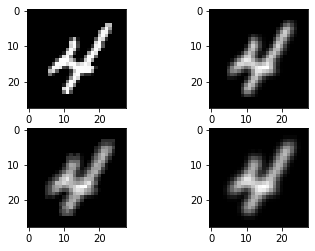

In [ ]:
# Showing the four images.
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(one_pic.reshape(dim,dim), cmap='gray')
axs[1,0].imshow(conv1.reshape(dim,dim), cmap='gray')
axs[0,1].imshow(conv2.reshape(dim,dim), cmap='gray')
axs[1,1].imshow(output.reshape(dim,dim), cmap='gray')

plt.show()

# Use vectors as filters 

In [ ]:
#Reshape filter and picture to prepare them for 2D convolution filter
one_pic_reshape=one_pic.reshape(1,1,dim, dim)

#filter 1
v11_t = torch.tensor([1,0,1])
v11_t_reshape = v11_t.reshape(1,1,1,3).float()

v12_t_reshape = np.transpose(v11_t).reshape(1,1,3,1).float()

#filter 2
v21_t = torch.tensor([0.33,0.66,0.99])
v21_t_reshape = v21_t.reshape(1,1,1,3).float()

v22_t = torch.tensor(np.transpose([1,1,1]))
v22_t_reshape = v22_t.reshape(1,1,3,1).float()

#filter 3
#red
v311_t = torch.tensor([0,1,0])
v311_t_reshape = v311_t.reshape(1,1,1,3).float()

v321_t = torch.tensor([1,1,1])
v321_t_reshape = v321_t.reshape(1,1,1,3).float()

#blue
v312_t = torch.tensor(np.transpose([1,1,1]))
v312_t_reshape = v312_t.reshape(1,1,3,1).float()

v322_t = torch.tensor(np.transpose([0,1,0]))
v322_t_reshape = v322_t.reshape(1,1,3,1).float()

#green
T = torch.tensor([1,1])
S1 = torch.tensor([1,0])
S2 = torch.tensor([0,1])


In [ ]:
#check filter are correct
#import numpy as np
#np.prod(np.ix_(v321_t, v322_t))

In [ ]:
conv1_inter_v = F.conv2d(one_pic_reshape, v11_t_reshape, padding = [0,1])
conv1_v = F.conv2d(conv1_inter_v, v12_t_reshape, padding = [1,0])

conv2_inter_v = F.conv2d(one_pic_reshape, v21_t_reshape, padding = [0,1])
conv2_v = F.conv2d(conv2_inter_v, v22_t_reshape, padding = [1,0])

#red
conv3_inter11_v = F.conv2d(conv1_v,v311_t_reshape,padding = [0,1])
conv3_inter21_v = F.conv2d(conv2_v,v321_t_reshape,padding = [0,1])

#blue
conv3_inter12_v = F.conv2d(conv3_inter11_v,v312_t_reshape,padding = [1,0])
conv3_inter22_v = F.conv2d(conv3_inter21_v,v322_t_reshape,padding = [1,0])

#combine blue 
output_v = conv3_inter12_v+conv3_inter22_v

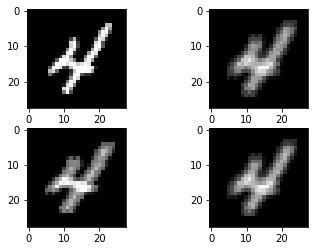

[13.969388]


In [ ]:
# Difference in convolution method for first conv
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(one_pic.reshape(dim,dim), cmap='gray')
axs[1,0].imshow(conv1_inter_v.reshape(dim,dim), cmap='gray')
axs[0,1].imshow(conv1_v.reshape(dim,dim), cmap='gray')
axs[1,1].imshow(conv1.reshape(dim,dim), cmap='gray')

plt.show()

m1 = (conv1.reshape(dim*dim,1)-conv1_v.reshape(dim*dim,1))/(dim*dim)
m1 = m1.numpy()

print(sum(m1))

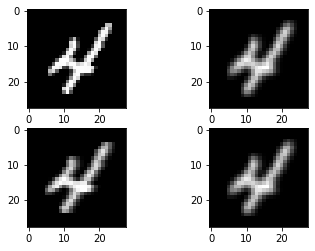

[4.7495894]


In [ ]:
# Difference in convolution method for second conv
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(one_pic.reshape(dim,dim), cmap='gray')
axs[1,0].imshow(conv2_inter_v.reshape(dim,dim), cmap='gray')
axs[0,1].imshow(conv2_v.reshape(dim,dim), cmap='gray')
axs[1,1].imshow(conv2.reshape(dim,dim), cmap='gray')

plt.show()

m2 = (conv2.reshape(dim*dim,1)-conv2_v.reshape(dim*dim,1))/(dim*dim)
m2 = m2.numpy()

print(sum(m2))

In [ ]:
max1 = max(one_pic.reshape(dim*dim))
max2 = max(output.reshape(dim*dim))
print(max2/max1)

tensor(28.1855)


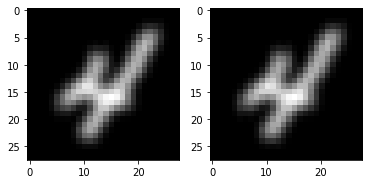

[56.15691]


In [ ]:
# Difference in convolution method for final conv
fig, axs = plt.subplots(1, 2)
axs[0].imshow(output.reshape(dim,dim), cmap='gray')
axs[1].imshow(output_v.reshape(dim,dim), cmap='gray')

plt.show()

m3 = (output.reshape(dim*dim,1)-output_v.reshape(dim*dim,1))/(dim*dim)
m3 = m3.numpy()

print(sum(m3))

# Using a Filter that is of rank greater than one.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
torch.Size([1, 1, 28, 28])


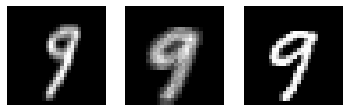

In [ ]:
nine1 = mnist_trainset.data[43].view(-1, 784).float()
nine2 = mnist_trainset.data[45].view(-1, 784).float()
nine = torch.cat((torch.tensor(nine1).reshape(1,1,dim,dim), torch.tensor(nine2).reshape(1,1,dim,dim)), 1)

# Make filters
filterbig = torch.tensor([  [[1,0,0],[1,0,0],[1,0,0]],
                            [[1,0,1],[0,1,0],[1,0,1]]
                            ])

filtervectorbase1 = torch.tensor([[1,0,0],[1,1,1]])
filtervectorbase2 = torch.tensor([[1,0,1],[1,0,1]])
filtervectorbase3 = torch.tensor([[0,1,0],[0,1,0]])

S = torch.tensor([[1,0],[0,1],[0,1]])
R = torch.tensor([[1,0,0],[0,1,1]])

# Filters correct size
filterbig_reshape = filterbig.reshape(1,2,3,3).float()

filtervectorbase11_reshape = (filtervectorbase1[0]).reshape(1,1,1,3).float()
filtervectorbase12_reshape = np.transpose(filtervectorbase1[1]).reshape(1,1,3,1).float()
filtervectorbase21_reshape = (filtervectorbase2[0]).reshape(1,1,1,3).float()
filtervectorbase22_reshape = np.transpose(filtervectorbase2[1]).reshape(1,1,3,1).float()
filtervectorbase31_reshape = filtervectorbase3[0].reshape(1,1,1,3).float()
filtervectorbase32_reshape = np.transpose(filtervectorbase3[1]).reshape(1,1,3,1).float()

# Convolutions
convbig = F.conv2d(nine, filterbig_reshape, padding = 1)

S1 = F.conv2d(nine,S[0].reshape(1,2,1,1).float())
S2 = F.conv2d(nine,S[1].reshape(1,2,1,1).float())
S3 = F.conv2d(nine,S[2].reshape(1,2,1,1).float())

conv11 = F.conv2d(S1,filtervectorbase11_reshape, padding = 1)
conv21 = F.conv2d(S2,filtervectorbase21_reshape, padding = 1)
conv31 = F.conv2d(S3,filtervectorbase31_reshape, padding = 1)

conv12 = F.conv2d(conv11,filtervectorbase12_reshape)
conv22 = F.conv2d(conv21,filtervectorbase22_reshape)
conv32 = F.conv2d(conv31,filtervectorbase32_reshape)

print(conv12.shape)

convdecomp1 = F.conv2d(torch.cat((conv12, conv22, conv32), 1),R[0].reshape(1,3,1,1).float())
convdecomp2 = F.conv2d(torch.cat((conv12, conv22, conv32), 1),R[1].reshape(1,3,1,1).float())

fig, axs = plt.subplots(1, 3)
axs[0].imshow(conv12.reshape(dim,dim), cmap='gray')
axs[1].imshow(conv22.reshape(dim,dim), cmap='gray')
axs[2].imshow(conv32.reshape(dim,dim), cmap='gray')

for i in range(3):
     axs[i].axis('off')

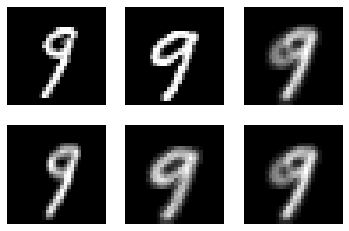

tensor([0.])


In [ ]:
fig, axs = plt.subplots(2, 3)
axs[0,0].imshow(nine1.reshape(dim,dim), cmap='gray')
axs[0,1].imshow(nine2.reshape(dim,dim), cmap='gray')
axs[0,2].imshow(convbig.reshape(dim,dim), cmap='gray')
axs[1,0].imshow(convdecomp1.reshape(dim,dim), cmap='gray')
axs[1,1].imshow(convdecomp2.reshape(dim,dim), cmap='gray')
axs[1,2].imshow((convdecomp1+convdecomp2).reshape(dim,dim), cmap='gray')
for i in range(2):
    for j in range(3):
        axs[i,j].axis('off')

plt.show()

print(sum((convdecomp1+convdecomp2).reshape(dim*dim,1)-convbig.reshape(dim*dim,1)))


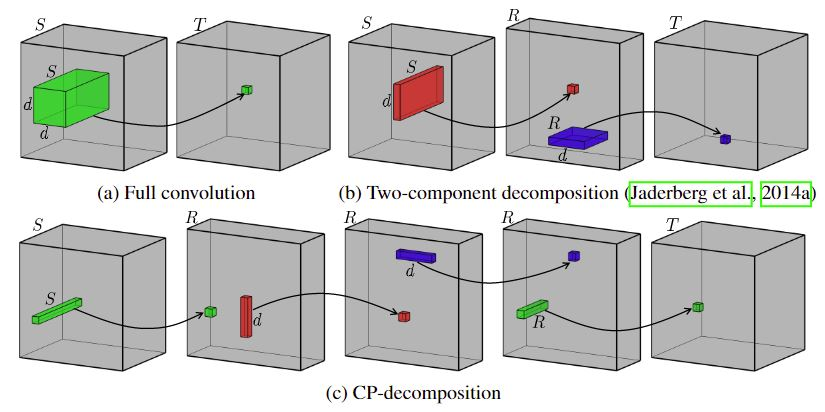

In [ ]:
from IPython.display import Image
Image("tensorspeed.JPG",width=500)
# Question 1:
# Do we need T units of filters that are d times d times S to get T output that is T channel deep?
# If yes then how is R ever gonne be different from ones(1,length(R))?

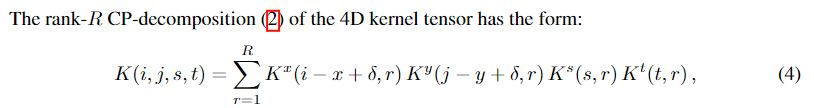

In [ ]:
Image("Kt.JPG",width=500)

# Use packages for decomposition

In [ ]:
def decompose_three_way(tensor, rank, max_iter=501, verbose=False):

    # a = np.random.random((rank, tensor.shape[0]))
    b = np.random.random((rank, tensor.shape[1]))
    c = np.random.random((rank, tensor.shape[2]))

    for epoch in range(max_iter):
        # optimize a
        input_a = khatri_rao([b.T, c.T])
        target_a = tl.unfold(tensor, mode=0).T
        a = np.linalg.solve(input_a.T.dot(input_a), input_a.T.dot(target_a))

        # optimize b
        input_b = khatri_rao([a.T, c.T])
        target_b = tl.unfold(tensor, mode=1).T
        b = np.linalg.solve(input_b.T.dot(input_b), input_b.T.dot(target_b))

        # optimize c
        input_c = khatri_rao([a.T, b.T])
        target_c = tl.unfold(tensor, mode=2).T
        c = np.linalg.solve(input_c.T.dot(input_c), input_c.T.dot(target_c))

        if verbose and epoch % int(max_iter * .2) == 0:
            res_a = np.square(input_a.dot(a) - target_a)
            res_b = np.square(input_b.dot(b) - target_b)
            res_c = np.square(input_c.dot(c) - target_c)
            print("Epoch:", epoch, "| Loss (C):", res_a.mean(), "| Loss (B):", res_b.mean(), "| Loss (C):", res_c.mean())

    return a.T, b.T, c.T

In [9]:
# Trying to copmute the parafrac modules of the made up example of a 3 mode tensor with rank 3

FB = [[[1,0,0],[1,0,0],[1,0,0]],[[1,0,1],[0,1,0],[1,0,1]]]#np.random.rand(2,3,3)

NAFB = tl.tensor(FB)

# Returns the errors
factors_np = tl.decomposition.parafac(NAFB, rank = 3,return_errors=True)

# Computes the decomposition
factors_np = tl.decomposition.parafac(NAFB, rank = 3)

print(factors_np[0])
print()
print(factors_np[1][0])
print()

# Copmuting the reconstruction manually and by function
parare1 = np.prod(np.ix_(factors_np[1][0][:,0],factors_np[1][1][:,0],factors_np[1][2][:,0]))+ \
np.prod(np.ix_(factors_np[1][0][:,1],factors_np[1][1][:,1],factors_np[1][2][:,1]))+ \
np.prod(np.ix_(factors_np[1][0][:,2],factors_np[1][1][:,2],factors_np[1][2][:,2]))

print(parare1)
print()

parare = tl.cp_to_tensor(factors_np)

print(parare)


[1. 1. 1.]

[[ 5.69233597e-01 -3.17750395e-01  4.21643371e-20]
 [ 2.36285969e+00 -1.08084294e-01 -4.03725852e-17]]

[[[ 1.00005853e+00  3.10452477e-04  1.92922523e-04]
  [ 9.99882992e-01 -6.20654748e-04 -3.85689561e-04]
  [ 1.00005853e+00  3.10452477e-04  1.92922523e-04]]

 [[ 9.99999966e-01 -1.79583428e-07  9.99999888e-01]
  [-1.08961253e-07  9.99999422e-01 -3.59166856e-07]
  [ 9.99999966e-01 -1.79583428e-07  9.99999888e-01]]]

[[[ 1.00005853e+00  3.10452477e-04  1.92922523e-04]
  [ 9.99882992e-01 -6.20654748e-04 -3.85689561e-04]
  [ 1.00005853e+00  3.10452477e-04  1.92922523e-04]]

 [[ 9.99999966e-01 -1.79583428e-07  9.99999888e-01]
  [-1.08961253e-07  9.99999422e-01 -3.59166855e-07]
  [ 9.99999966e-01 -1.79583428e-07  9.99999888e-01]]]


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


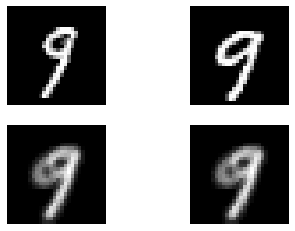

tensor(6.5759)


In [5]:
# Complete decomposition block 3D

# Retrieving the numbers
nine1 = mnist_trainset.data[43].view(-1, 784).float()
nine2 = mnist_trainset.data[45].view(-1, 784).float()
nine = torch.cat((torch.tensor(nine1).reshape(1,1,dim,dim), torch.tensor(nine2).reshape(1,1,dim,dim)), 1)

# Creating the filter, the decomposition, and the application of the filter to the pictures.
randomFilter = [[[1,0,0],[1,0,0],[1,0,0]],[[1,0,1],[0,1,0],[1,0,1]]] #np.random.rand(2,3,3) #Choose constructed or random
randomFilter_tl = tl.tensor(randomFilter)
randomFilter_t = torch.tensor(randomFilter)
randomFilter_r = randomFilter_t.reshape(1,2,3,3).float()
convrandomFilter = F.conv2d(nine, randomFilter_r, padding = 1)
RFD = tl.decomposition.parafac(randomFilter_tl, rank = 3)
Filter1 = RFD[1][0]
Filter2 = RFD[1][1]
Filter3 = RFD[1][2]

# Applying the first layer of the decomposed filter
Layer11 = F.conv2d(nine,torch.tensor(Filter1[:,0].reshape(1,2,1,1)).float())
Layer12 = F.conv2d(nine,torch.tensor(Filter1[:,1].reshape(1,2,1,1)).float())
Layer13 = F.conv2d(nine,torch.tensor(Filter1[:,2].reshape(1,2,1,1)).float())

# Applying the second layer of the decomposed filter
Layer21 = F.conv2d(Layer11,torch.tensor(Filter2[:,0].reshape(1,1,3,1)).float(),padding = 1)
Layer22 = F.conv2d(Layer12,torch.tensor(Filter2[:,1].reshape(1,1,3,1)).float(),padding = 1)
Layer23 = F.conv2d(Layer13,torch.tensor(Filter2[:,2].reshape(1,1,3,1)).float(),padding = 1)

# Applying the third layer of the decomposed filter
Layer31 = F.conv2d(Layer21,torch.tensor(Filter3[:,0].reshape(1,1,1,3)).float())
Layer32 = F.conv2d(Layer22,torch.tensor(Filter3[:,1].reshape(1,1,1,3)).float())
Layer33 = F.conv2d(Layer23,torch.tensor(Filter3[:,2].reshape(1,1,1,3)).float())

# Showing the result
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(nine1.reshape(dim,dim), cmap='gray')
axs[0,1].imshow(nine2.reshape(dim,dim), cmap='gray')
axs[1,0].imshow(convrandomFilter.reshape(dim,dim), cmap='gray')
axs[1,1].imshow((Layer31+Layer32+Layer33).reshape(dim,dim), cmap='gray')

for i in range(2):
    for j in range(2):
        axs[i,j].axis('off')

plt.show()

print(sum(abs((Layer31+Layer32+Layer33).reshape(dim*dim)-convrandomFilter.reshape(dim*dim))))

In [92]:
#!pip install tensorflow
import tensorflow as tf
rank = tf.rank(randomFilter)
print(rank)

#import scipy as sp
#randomFilter_np = randomFilter.numpy()
#rank2 = sp.linalg.interpolative.estimate_rank(randomFilter_np,1)


tf.Tensor(4, shape=(), dtype=int32)


In [71]:
def EVBMF(Y, sigma2=None, H=None):
    """Implementation of the analytical solution to Empirical Variational Bayes Matrix Factorization.
    This function can be used to calculate the analytical solution to empirical VBMF. 
    This is based on the paper and MatLab code by Nakajima et al.:
    "Global analytic solution of fully-observed variational Bayesian matrix factorization."
    Notes
    -----
        If sigma2 is unspecified, it is estimated by minimizing the free energy.
        If H is unspecified, it is set to the smallest of the sides of the input Y.
    Attributes
    ----------
    Y : numpy-array
        Input matrix that is to be factorized. Y has shape (L,M), where L<=M.
    
    sigma2 : int or None (default=None)
        Variance of the noise on Y.
        
    H : int or None (default = None)
        Maximum rank of the factorized matrices.
        
    Returns
    -------
    U : numpy-array
        Left-singular vectors. 
        
    S : numpy-array
        Diagonal matrix of singular values.
        
    V : numpy-array
        Right-singular vectors.
        
    post : dictionary
        Dictionary containing the computed posterior values.
        
        
    References
    ----------
    .. [1] Nakajima, Shinichi, et al. "Global analytic solution of fully-observed variational Bayesian matrix factorization." Journal of Machine Learning Research 14.Jan (2013): 1-37.
    
    .. [2] Nakajima, Shinichi, et al. "Perfect dimensionality recovery by variational Bayesian PCA." Advances in Neural Information Processing Systems. 2012.     
    """   
    L,M = Y.shape #has to be L<=M

    if H is None:
        H = L

    alpha = L/M
    tauubar = 2.5129*np.sqrt(alpha)
    
    #SVD of the input matrix, max rank of H
    U,s,V = np.linalg.svd(Y)
    U = U[:,:H]
    s = s[:H]
    V = V[:H].T 

    #Calculate residual
    residual = 0.
    if H<L:
        residual = np.sum(np.sum(Y**2)-np.sum(s**2))

    #Estimation of the variance when sigma2 is unspecified
    if sigma2 is None: 
        xubar = (1+tauubar)*(1+alpha/tauubar)
        eH_ub = int(np.min([np.ceil(L/(1+alpha))-1, H]))-1
        upper_bound = (np.sum(s**2)+residual)/(L*M)
        lower_bound = np.max([s[eH_ub+1]**2/(M*xubar), np.mean(s[eH_ub+1:]**2)/M])

        scale = 1.#/lower_bound
        s = s*np.sqrt(scale)
        residual = residual*scale
        lower_bound = lower_bound*scale
        upper_bound = upper_bound*scale

        sigma2_opt = minimize_scalar(EVBsigma2, args=(L,M,s,residual,xubar), bounds=[lower_bound, upper_bound], method='Bounded')
        sigma2 = sigma2_opt.x

    #Threshold gamma term
    threshold = np.sqrt(M*sigma2*(1+tauubar)*(1+alpha/tauubar))
    pos = np.sum(s>threshold)

    #Formula (15) from [2]
    d = np.multiply(s[:pos]/2, 1-np.divide((L+M)*sigma2, s[:pos]**2) + np.sqrt((1-np.divide((L+M)*sigma2, s[:pos]**2))**2 -4*L*M*sigma2**2/s[:pos]**4) )

    #Computation of the posterior
    post = {}
    post['ma'] = np.zeros(H) 
    post['mb'] = np.zeros(H)
    post['sa2'] = np.zeros(H) 
    post['sb2'] = np.zeros(H) 
    post['cacb'] = np.zeros(H)  

    tau = np.multiply(d, s[:pos])/(M*sigma2)
    delta = np.multiply(np.sqrt(np.divide(M*d, L*s[:pos])), 1+alpha/tau)

    post['ma'][:pos] = np.sqrt(np.multiply(d, delta))
    post['mb'][:pos] = np.sqrt(np.divide(d, delta))
    post['sa2'][:pos] = np.divide(sigma2*delta, s[:pos])
    post['sb2'][:pos] = np.divide(sigma2, np.multiply(delta, s[:pos]))
    post['cacb'][:pos] = np.sqrt(np.multiply(d, s[:pos])/(L*M))
    post['sigma2'] = sigma2
    post['F'] = 0.5*(L*M*np.log(2*np.pi*sigma2) + (residual+np.sum(s**2))/sigma2 
                     + np.sum(M*np.log(tau+1) + L*np.log(tau/alpha +1) - M*tau))

    return U[:,:pos], np.diag(d), V[:,:pos], post

In [90]:
def estimate_ranks(weight_tensor, dimensions):
    ranks = []
    for dim in dimensions:
        _, diag, _, _ = EVBMF(tl.unfold(weight_tensor, dim))
        if diag.shape[dim] == 0:
            ranks.append(1)
        else:
            ranks.append(diag.shape[dim])
    return ranks

ranks = None

ranks = estimate_ranks(randomFilter, [0, 1,0]) if ranks is None else ranks

TypeError: transpose() received an invalid combination of arguments - got (list), but expected one of:
 * (name dim0, name dim1)
 * (int dim0, int dim1)


In [95]:
randomFilter2 = torch.tensor(np.random.rand(2,3,3)).reshape(2,3,3,1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


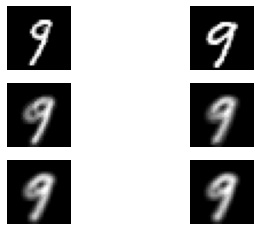

tensor(120488.2578)
tensor(123291.7422)


In [96]:
# Complete decomposition block 4D (2 filters of size 2*3*3)
import random

random.seed(100)
# Retrieving the numbers
nine1 = mnist_trainset.data[43].view(-1, 784).float()
nine2 = mnist_trainset.data[45].view(-1, 784).float()
nine = torch.cat((torch.tensor(nine1).reshape(1,1,dim,dim), torch.tensor(nine2).reshape(1,1,dim,dim)), 1)

# Creating the filter, the decomposition, and the application of the filters to the pictures.
randomFilter1 = torch.tensor([[[1,0,0],[1,0,0],[1,0,0]],[[1,0,1],[0,1,0],[1,0,1]]]).reshape(2,3,3,1)
#randomFilter2 = torch.tensor(np.random.rand(2,3,3)).reshape(2,3,3,1)
randomFilter = torch.cat((randomFilter1,randomFilter2),3)

convrandomFilter1 = F.conv2d(nine, randomFilter1.reshape(1,2,3,3).float(), padding = 1)
convrandomFilter2 = F.conv2d(nine, randomFilter2.reshape(1,2,3,3).float(), padding = 1)

RANK = 3

RFD = tl.decomposition.parafac(tl.tensor(randomFilter), rank = RANK)

Filter1 = RFD[1][0]
Filter2 = RFD[1][1]
Filter3 = RFD[1][2]
Filter4 = RFD[1][3]

# Applying the first layer of the decomposed filter
Layer11 = F.conv2d(nine,torch.tensor(Filter1[:,0].reshape(1,2,1,1)).float())
Layer12 = F.conv2d(nine,torch.tensor(Filter1[:,1].reshape(1,2,1,1)).float())
Layer13 = F.conv2d(nine,torch.tensor(Filter1[:,2].reshape(1,2,1,1)).float())

# Applying the second layer of the decomposed filter
Layer21 = F.conv2d(Layer11,torch.tensor(Filter2[:,0].reshape(1,1,3,1)).float(),padding = 1)
Layer22 = F.conv2d(Layer12,torch.tensor(Filter2[:,1].reshape(1,1,3,1)).float(),padding = 1)
Layer23 = F.conv2d(Layer13,torch.tensor(Filter2[:,2].reshape(1,1,3,1)).float(),padding = 1)

# Applying the third layer of the decomposed filter
Layer31 = F.conv2d(Layer21,torch.tensor(Filter3[:,0].reshape(1,1,1,3)).float())
Layer32 = F.conv2d(Layer22,torch.tensor(Filter3[:,1].reshape(1,1,1,3)).float())
Layer33 = F.conv2d(Layer23,torch.tensor(Filter3[:,2].reshape(1,1,1,3)).float())
Layer3 = torch.cat((Layer31,Layer31,Layer31),1)

# Applying the fourth layer of the decomposed filter
Layer41 = F.conv2d(Layer3,torch.tensor(Filter4[0].reshape(1,3,1,1)).float())
Layer42 = F.conv2d(Layer3,torch.tensor(Filter4[1].reshape(1,3,1,1)).float())

# Showing the result
fig, axs = plt.subplots(3, 2)
axs[0,0].imshow(nine1.reshape(dim,dim), cmap='gray')
axs[0,1].imshow(nine2.reshape(dim,dim), cmap='gray')
axs[1,0].imshow(convrandomFilter1.reshape(dim,dim), cmap='gray')
axs[1,1].imshow(convrandomFilter2.reshape(dim,dim), cmap='gray')
axs[2,0].imshow(Layer41.reshape(dim,dim), cmap='gray')
axs[2,1].imshow(Layer42.reshape(dim,dim), cmap='gray')

for i in range(3):
    for j in range(2):
        axs[i,j].axis('off')
plt.show()

# Calculating the difference
print(sum(abs(Layer41.reshape(dim*dim)-convrandomFilter1.reshape(dim*dim))))
print(sum(abs(Layer42.reshape(dim*dim)-convrandomFilter2.reshape(dim*dim))))


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
First filter is: 
[[[1, 0, 0], [1, 0, 0], [1, 0, 0]], [[1, 0, 1], [0, 1, 0], [1, 0, 1]]]

Second filter is: 
[[[0.6, 0.5, 0.5], [0.8, 1, 0.3], [0.2, 0.1, 0.3]], [[0.2, 0.2, 0.1], [0.4, 0.4, 0.3], [0.6, 0.6, 0.5]]]



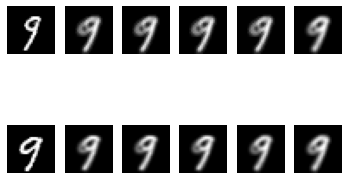

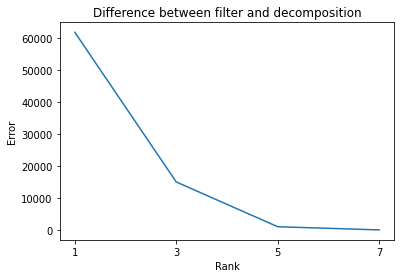

In [133]:
# making 4D decomposition depend on RANK

# Retrieving the numbers
nine1 = mnist_trainset.data[43].view(-1, 784).float()
nine2 = mnist_trainset.data[45].view(-1, 784).float()
inputchannel = 2
outputchannel = 2
spatialx = 3
spatialy = 3

nine = torch.cat((torch.tensor(nine1).reshape(1,1,dim,dim), torch.tensor(nine2).reshape(1,1,dim,dim)), 1)

# Creating the filter, the decomposition, and the application of the filters to the pictures.
randomFilter1 = torch.tensor([[[1,0,0],[1,0,0],[1,0,0]],[[1,0,1],[0,1,0],[1,0,1]]]).reshape(2,3,3,1)
#randomFilter2 = torch.tensor(np.random.rand(2,3,3)).reshape(2,3,3,1)
randomFilter2 = torch.tensor([[[.6,.5,.5],[.8,1,.3],[.2,.1,.3]],[[.2,.2,.1],[.4,.4,.3],[.6,.6,.5]]]).reshape(2,3,3,1)
randomFilter = torch.cat((randomFilter1,randomFilter2),3)
convrandomFilter1 = F.conv2d(nine, randomFilter1.reshape(1,2,3,3).float(), padding = 1)
convrandomFilter2 = F.conv2d(nine, randomFilter2.reshape(1,2,3,3).float(), padding = 1)

RANKLIST = [7,5,3,1]

fig, axs = plt.subplots(2, 2+len(RANKLIST))
axs[0,0].imshow(nine1.reshape(dim,dim), cmap='gray')
axs[1,0].imshow(nine2.reshape(dim,dim), cmap='gray')
axs[0,1].imshow(convrandomFilter1.reshape(dim,dim), cmap='gray')
axs[1,1].imshow(convrandomFilter2.reshape(dim,dim), cmap='gray')

ERRORLIST = []

for r,R in enumerate(RANKLIST):
    RANK = R

    RFD = tl.decomposition.parafac(tl.tensor(randomFilter), rank = RANK)
    #print(RFD[1])
    FilterList = []
    for i in range(4):
        FilterList.append(RFD[1][i])

    # Applying the filters to the layers
    Layer1List = []
    for i in range(RANK):
        Layer1List.append(F.conv2d(nine,torch.tensor(FilterList[0][:,i].reshape(1,inputchannel,1,1)).float()))

    Layer2List = []
    for i in range(RANK):
        Layer2List.append(F.conv2d(Layer1List[i],torch.tensor(FilterList[1][:,i].reshape(1,1,spatialx,1)).float(),padding = 1))

    Layer3List = []
    Layer3 = []
    for i in range(RANK):
        Layer3List.append(F.conv2d(Layer2List[i],torch.tensor(FilterList[2][:,i].reshape(1,1,1,spatialy)).float()))
        if i == 0:
            Layer3 = Layer3List[i]
        else:
            Layer3 = torch.cat((Layer3,Layer3List[-1]),1)

    Layer4List = []
    for i in range(outputchannel):
        Layer4List.append(F.conv2d(Layer3,torch.tensor(FilterList[3][i].reshape(1,RANK,1,1)).float()))

    axs[0,r+2].imshow(Layer4List[0].reshape(dim,dim), cmap='gray')
    axs[1,r+2].imshow(Layer4List[1].reshape(dim,dim), cmap='gray')

    # Calculating the difference
    ERRORLIST.append(sum(abs(Layer4List[0].reshape(dim*dim)-convrandomFilter1.reshape(dim*dim))) + \
                     sum(abs(Layer4List[1].reshape(dim*dim)-convrandomFilter2.reshape(dim*dim))).numpy())

print("First filter is: ")
print([[[1,0,0],[1,0,0],[1,0,0]],[[1,0,1],[0,1,0],[1,0,1]]])
print()
print("Second filter is: ")
print([[[.6,.5,.5],[.8,1,.3],[.2,.1,.3]],[[.2,.2,.1],[.4,.4,.3],[.6,.6,.5]]])
print()

# Showing the result
for i in range(2):
    for j in range(2+len(RANKLIST)):
        axs[i,j].axis('off')
plt.show()

plt.plot(RANKLIST,ERRORLIST)
plt.xticks(RANKLIST, RANKLIST)
plt.xlabel("Rank")
plt.ylabel("Error")
plt.title("Difference between filter and decomposition")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c990da9a-98f2-4e30-be93-fd0fa019b18f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>